In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [106]:
import seaborn as sns
dark=sns.color_palette('dark')
bright=sns.color_palette('bright')
deep=sns.color_palette('deep')
pastel=sns.color_palette('pastel')
plt.style.use('seaborn-dark')
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [107]:
df=pd.read_excel("Test_set.xlsx")

# New Section

In [108]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,3897
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop,7662
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,13882
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop,6218
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,13302


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Dep_Time         2671 non-null   object
 5   Arrival_Time     2671 non-null   object
 6   Duration         2671 non-null   object
 7   Total_Stops      2671 non-null   object
 8   Price            2671 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 187.9+ KB


In [110]:
df.sample(8)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
1923,Air India,12/06/2019,Delhi,Cochin,05:15,06:50 13 Jun,25h 35m,1 stop,5644
2213,Jet Airways,18/06/2019,Banglore,Delhi,18:55,22:00,3h 5m,non-stop,5583
2090,Air India,12/06/2019,Kolkata,Banglore,10:00,05:25 13 Jun,19h 25m,2 stops,8586
2425,IndiGo,27/03/2019,Delhi,Cochin,08:35,16:10,7h 35m,1 stop,4668
36,Jet Airways,18/03/2019,Mumbai,Hyderabad,07:10,08:35,1h 25m,non-stop,4649
261,IndiGo,27/03/2019,Mumbai,Hyderabad,02:30,04:00,1h 30m,non-stop,6722
622,Jet Airways,21/05/2019,Delhi,Cochin,13:00,19:00,6h,1 stop,3971
1108,Air India,6/05/2019,Kolkata,Banglore,07:00,05:25 07 May,22h 25m,2 stops,10262


In [111]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

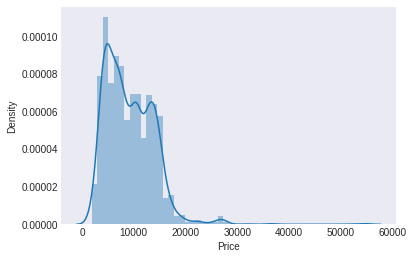

In [112]:
sns.distplot(df['Price'])

In [113]:
df[df.Price>40000]['Price'].count()

3

In [114]:
df[df.Price<2000]['Price'].count()

12

In [115]:
nominal_categorical_columns=[feature for feature in df.columns if df[feature].dtype=='0' and df[feature.nunique()<15]]

In [116]:
nominal_categorical_columns

[]

In [117]:
ordinal_categorical_columns=[feature for feature in df.columns if df[feature].dtype=='0' and df[feature.nunique()>15]]

In [118]:
ordinal_categorical_columns

[]

In [119]:
from datetime import date 
df['temp']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')



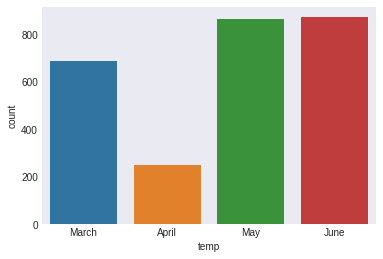

In [120]:
ax=sns.countplot(df['temp'].dt.month)
labels=['March','April','May','June']

ax.set_xticklabels(labels)
df.drop('temp',axis=1,inplace=True)

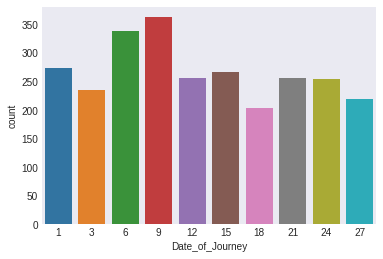

In [121]:
from datetime import date 
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')
ax=sns.countplot(df['Date_of_Journey'].dt.day)

In [122]:
df['Dep_Time'].head()

0    17:30
1    06:20
2    19:15
3    08:00
4    23:55
Name: Dep_Time, dtype: object

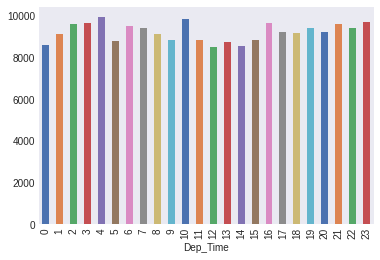

In [123]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'],format='%H:%M')
df.groupby(df['Dep_Time'].dt.hour)['Price'].mean().plot.bar(color=deep)
#ax=sns.countplot(df['Date_of_Journey'].dt.day)

In [124]:
df.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

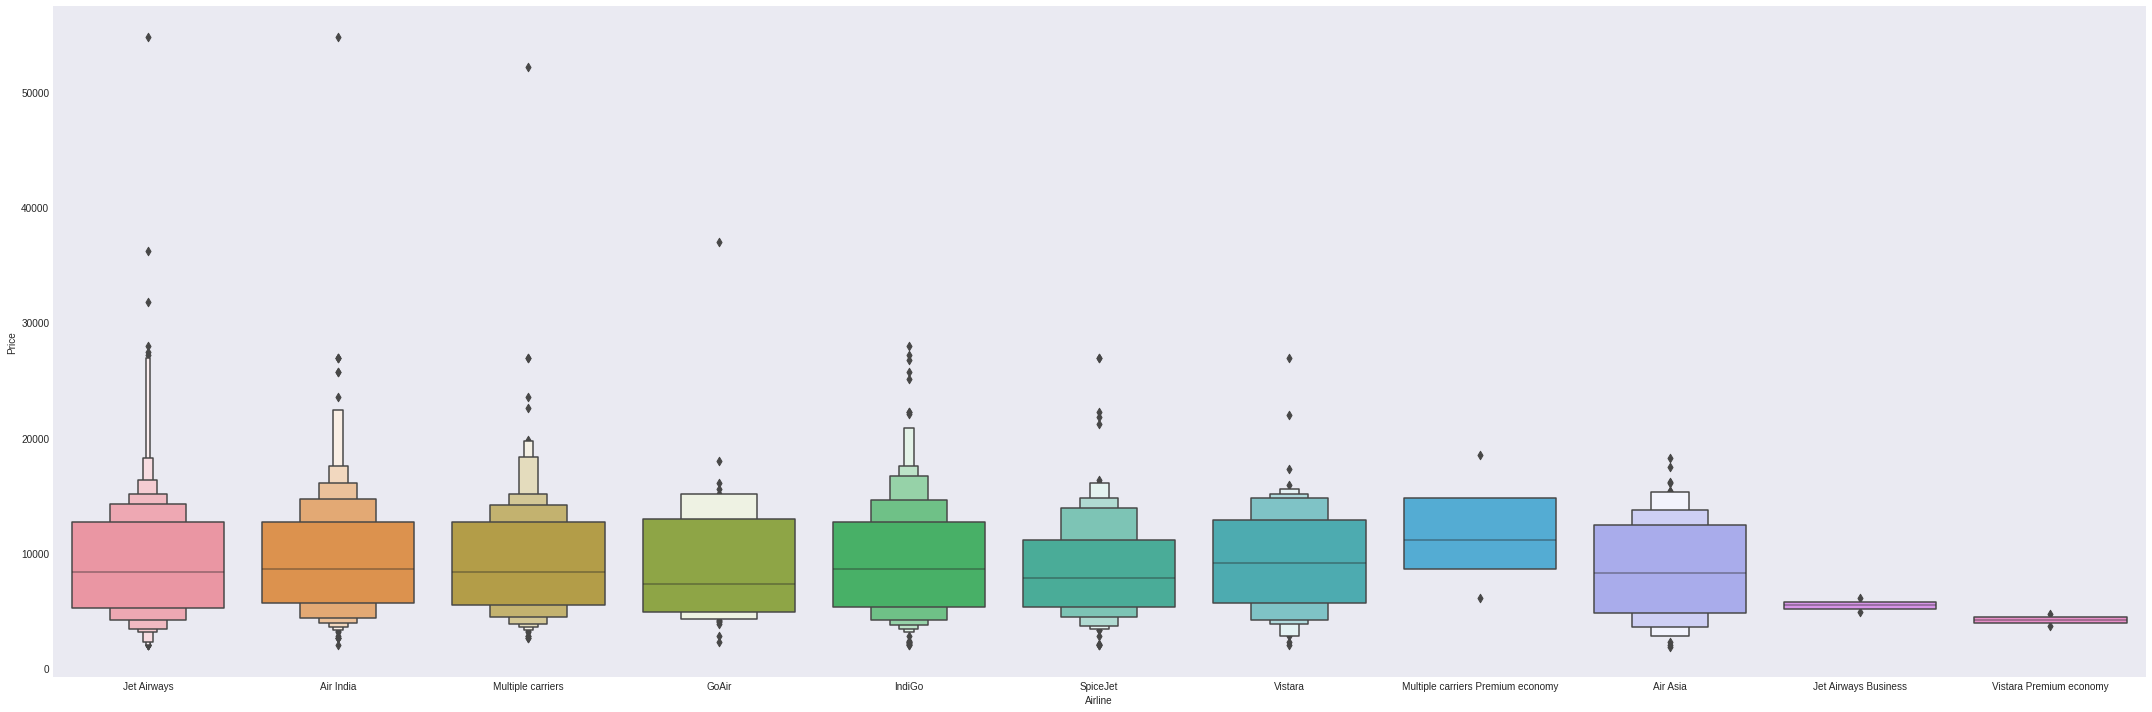

In [125]:
sns.catplot(y="Price",x="Airline",data=df.sort_values("Price",ascending=False),kind="boxen",height=10,aspect=3)
plt.show()

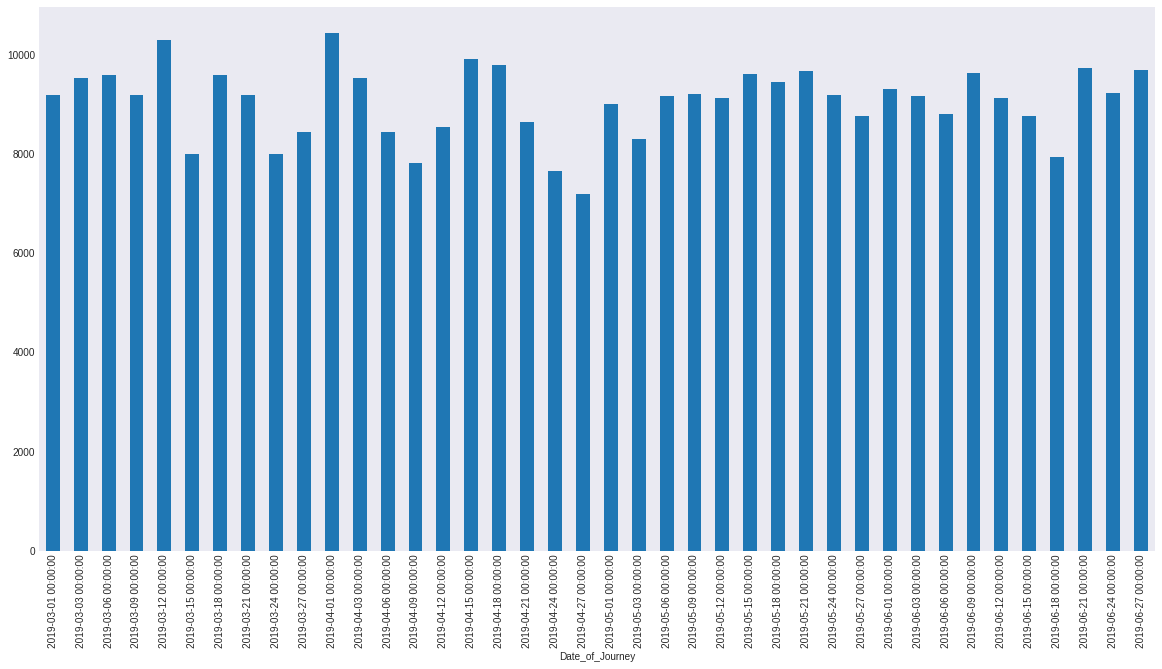

In [126]:
df['Date_of_Journey'].unique(),df['Date_of_Journey'].nunique()
df.groupby('Date_of_Journey')['Price'].mean().plot.bar(figsize=(20,10))

In [127]:
max_fare=df[df['Price']==df['Price'].max()][['Date_of_Journey','Price','Airline','Duration']]

In [128]:
max_fare.head()

,Date_of_Journey,Price,Airline,Duration
1478,2019-05-15,54826,Air India,23h 30m
2618,2019-05-21,54826,Jet Airways,29h 5m


In [129]:
min_fare=df[df['Price']==df['Price'].min()][['Date_of_Journey','Price','Airline','Duration']]

In [130]:
min_fare.head()

,Date_of_Journey,Price,Airline,Duration
1513,2019-06-12,1840,Air Asia,14h 25m


In [131]:
df.Source.unique()

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

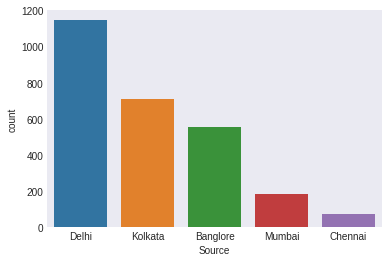

In [132]:
ax=sns.countplot(data=df,x='Source')


In [133]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [134]:
def extract_day_and_month(data,col):
  df[col]=pd.to_datetime(df[col])
  data[col+'_Date']=data[col].dt.day
  data[col+'_Month']=data[col].dt.month

def extract_hour_and_min(data,col):
  df[col]=pd.to_datetime(df[col])
  data[col+'_Hour']=data[col].dt.hour 
  data[col+'_Min']=data[col].dt.minute

In [135]:
extract_day_and_month(df,'Date_of_Journey')

In [136]:
extract_hour_and_min(df,'Arrival_Time')
extract_hour_and_min(df,'Dep_Time')

In [137]:
df.drop(['Date_of_Journey','Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [138]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,3897,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,4h,1 stop,7662,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,13882,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,13h,1 stop,6218,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,13302,24,6,2,45,23,55


In [139]:
def handle_single_duration_data(df,col):
  for i in range(len(df[col])):
    if "h" in  df[col][i]:
      df[col][i]=df[col][i].strip() + " 0m"
    else:
      df[col][i]= "0h " + df[col][i]





In [140]:
def extract_hour_from_duration(val):
  return val.split(' ')[0][0:-1]

In [141]:
def extract_minutes_from_duration(val):
  return val.split(' ')[1][0:-1]

In [142]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,3897,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,4h,1 stop,7662,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,13882,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,13h,1 stop,6218,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,13302,24,6,2,45,23,55


handle_single_duration_data(df,'Duration')

In [143]:
handle_single_duration_data(df,'Duration')


In [144]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min
0,Jet Airways,Delhi,Cochin,10h 55m 0m,1 stop,3897,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,4h 0m,1 stop,7662,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,23h 45m 0m,1 stop,13882,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,13h 0m,1 stop,6218,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,2h 50m 0m,non-stop,13302,24,6,2,45,23,55


In [145]:
df['Duration_Hour']=df['Duration'].apply(extract_hour_from_duration)
df['Duration_Minute']=df['Duration'].apply(extract_minutes_from_duration)

In [146]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Minute
0,Jet Airways,Delhi,Cochin,10h 55m 0m,1 stop,3897,6,6,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,4h 0m,1 stop,7662,12,5,10,20,6,20,4,0
2,Jet Airways,Delhi,Cochin,23h 45m 0m,1 stop,13882,21,5,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,13h 0m,1 stop,6218,21,5,21,0,8,0,13,0
4,Air Asia,Banglore,Delhi,2h 50m 0m,non-stop,13302,24,6,2,45,23,55,2,50


In [147]:
df['Duration_Hour']=df['Duration_Hour'].astype(int)
df['Duration_Minute']=df['Duration_Minute'].astype(int)

In [148]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Minute
0,Jet Airways,Delhi,Cochin,10h 55m 0m,1 stop,3897,6,6,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,4h 0m,1 stop,7662,12,5,10,20,6,20,4,0
2,Jet Airways,Delhi,Cochin,23h 45m 0m,1 stop,13882,21,5,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,13h 0m,1 stop,6218,21,5,21,0,8,0,13,0
4,Air Asia,Banglore,Delhi,2h 50m 0m,non-stop,13302,24,6,2,45,23,55,2,50


In [149]:
df.drop('Duration',axis=1,inplace=True)

In [150]:
df['Total_Stops'].head()

0      1 stop
1      1 stop
2      1 stop
3      1 stop
4    non-stop
Name: Total_Stops, dtype: object

In [151]:
df['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [152]:
df.Total_Stops.isna().sum()

0

In [153]:
df.dropna(inplace=True)

In [154]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}).astype(int)

In [155]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Minute
0,Jet Airways,Delhi,Cochin,1,3897,6,6,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,1,7662,12,5,10,20,6,20,4,0
2,Jet Airways,Delhi,Cochin,1,13882,21,5,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,1,6218,21,5,21,0,8,0,13,0
4,Air Asia,Banglore,Delhi,0,13302,24,6,2,45,23,55,2,50


In [156]:
df['Airline'].head()

0          Jet Airways
1               IndiGo
2          Jet Airways
3    Multiple carriers
4             Air Asia
Name: Airline, dtype: object

In [157]:
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)

In [158]:
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0


In [159]:
df['Source'].head()

0       Delhi
1     Kolkata
2       Delhi
3       Delhi
4    Banglore
Name: Source, dtype: object

In [160]:
Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)

In [161]:
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
2666,0,0,1,0
2667,0,0,1,0
2668,0,1,0,0
2669,0,1,0,0


In [162]:
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)

In [163]:
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
2666,0,0,0,0,0
2667,0,0,0,0,0
2668,1,0,0,0,0
2669,1,0,0,0,0


In [164]:
df.drop(['Destination','Source','Airline'],axis=1,inplace=True)

In [165]:
df['Price']=df['Price'].astype(int)

In [166]:
final_df=pd.concat([df,Airline,Source,Destination],axis=1)

In [167]:
final_df.head()

,Total_Stops,Price,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,3897,6,6,4,25,17,30,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,7662,12,5,10,20,6,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,13882,21,5,19,0,19,15,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,21,5,21,0,8,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,13302,24,6,2,45,23,55,2,50,...,0,0,0,0,0,0,1,0,0,0


In [168]:
X=final_df.drop('Price',axis=1)
X.head()

,Total_Stops,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,4,25,17,30,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,10,20,6,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [169]:
y=final_df['Price'].astype(int)
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

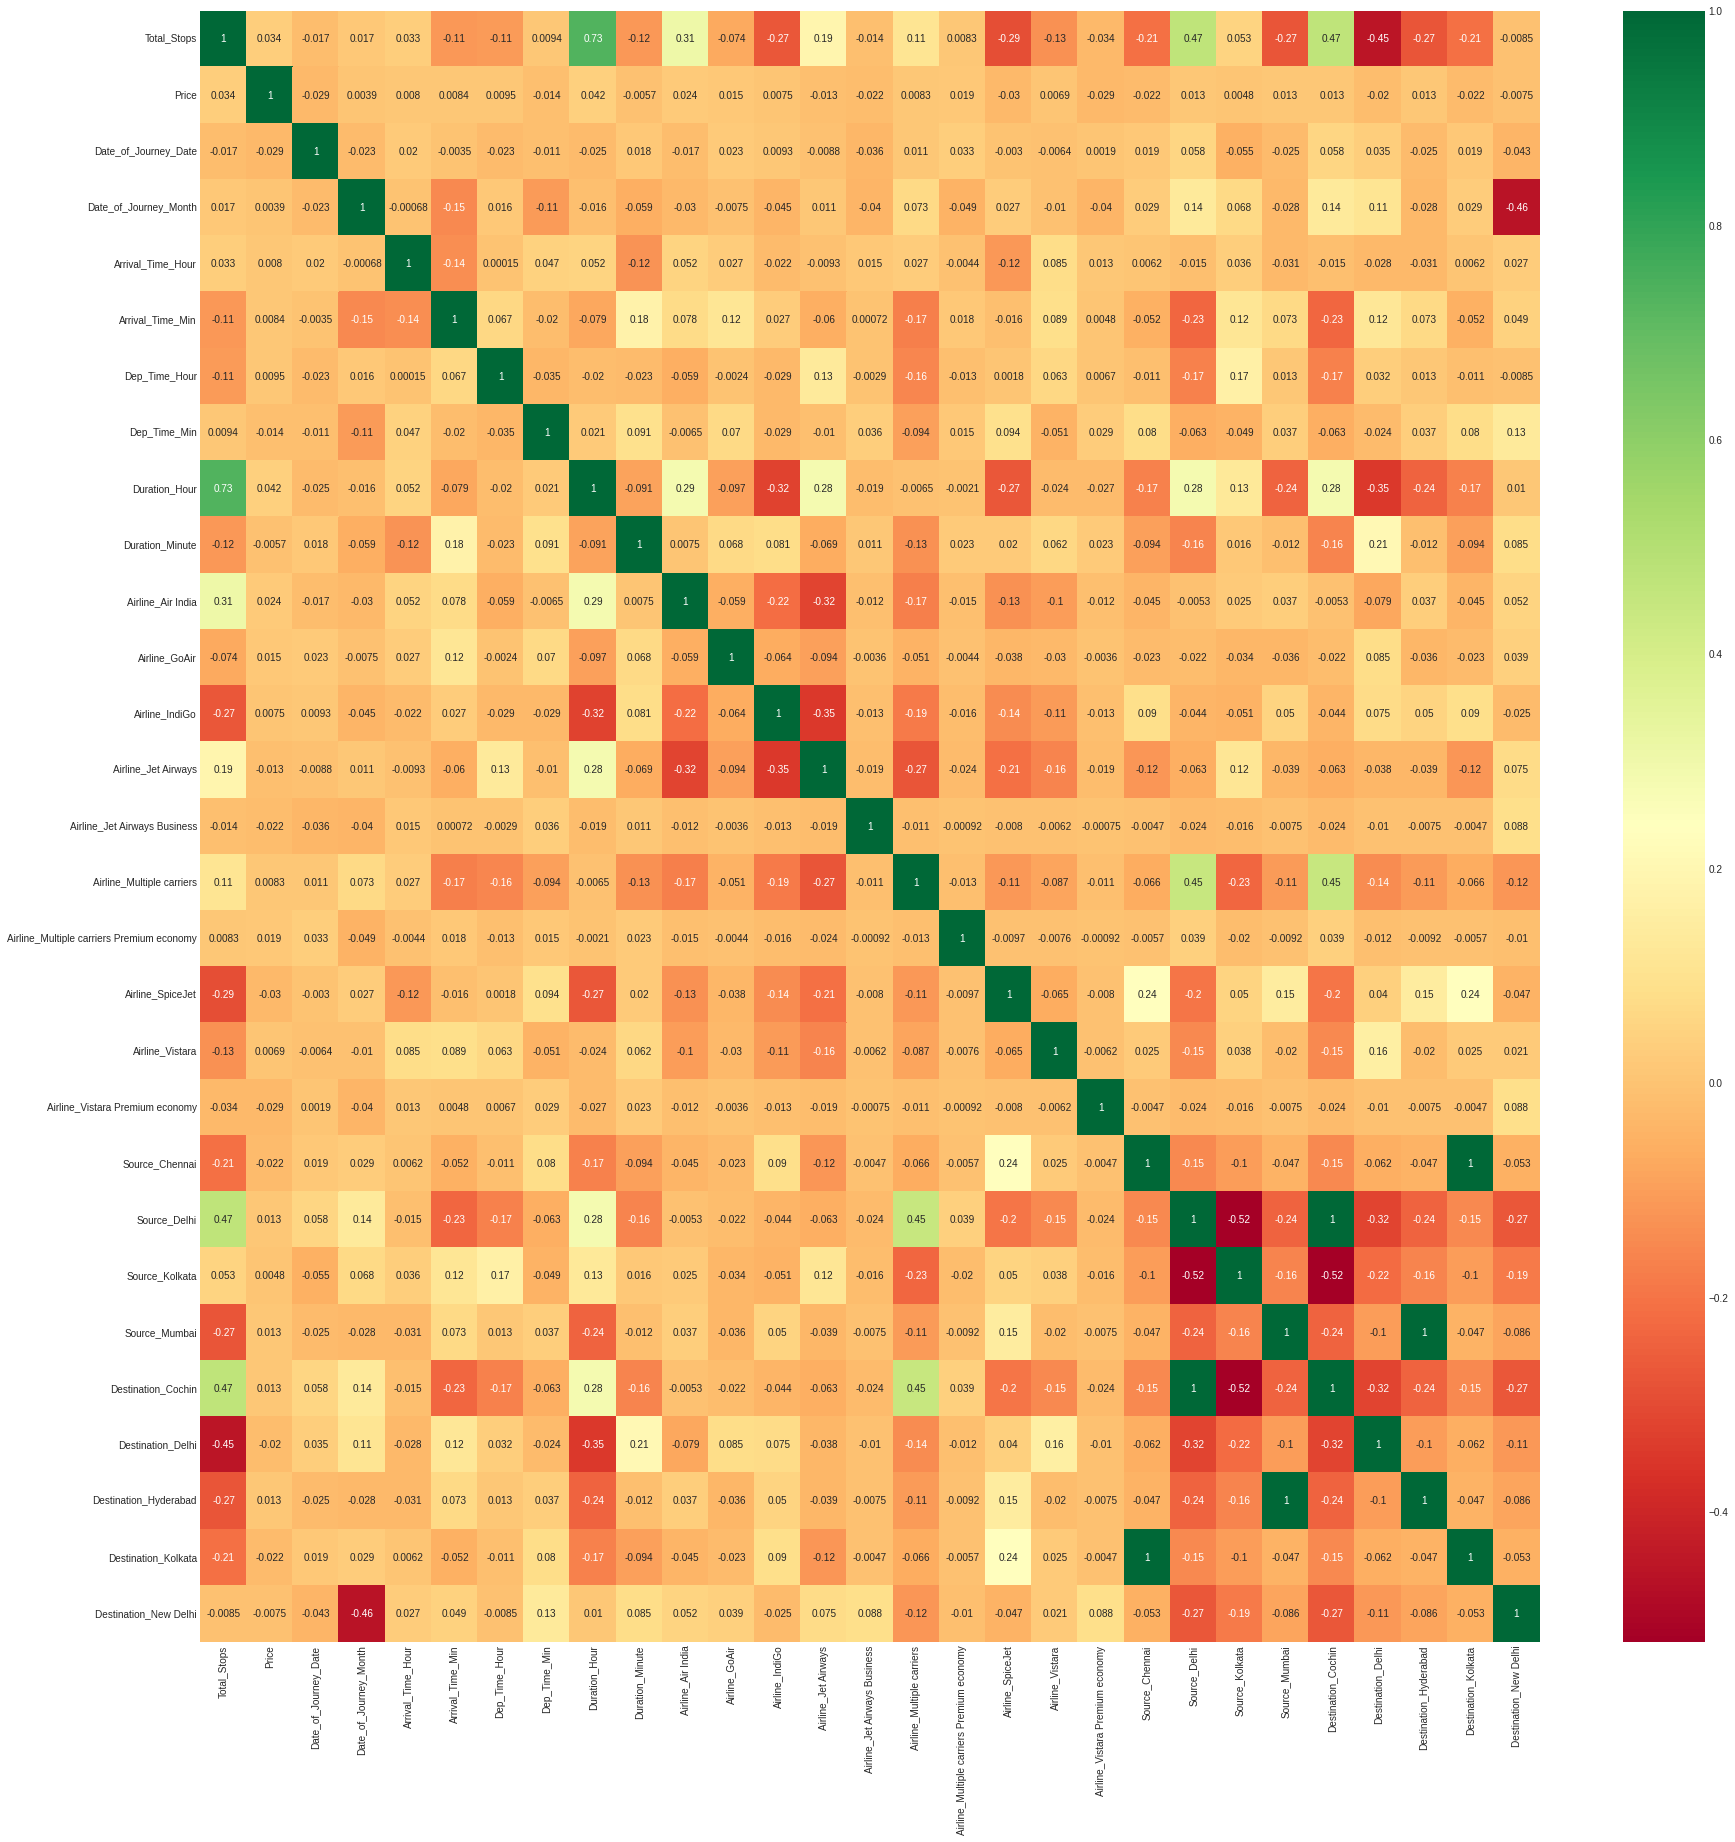

In [170]:
plt.figure(figsize=(30,30))
sns.heatmap(final_df.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [171]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)
feature_imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns,columns=['importance'])
feature_imp.sort_values('importance',ascending=False)

,importance
Total_Stops,0.549365
Source_Delhi,0.304155
Destination_Cochin,0.221540
Date_of_Journey_Month,0.183478
Source_Kolkata,0.148404
Airline_Jet Airways,0.097222
Dep_Time_Min,0.093251
Date_of_Journey_Date,0.079922
Airline_Air India,0.062353
Arrival_Time_Hour,0.057881


In [172]:
X=final_df.drop('Price',axis=1)
y=final_df['Price']

In [173]:
mutual_info_classif(X,y)

array([0.55612032, 0.08235686, 0.22932237, 0.07247986, 0.02076043,
       0.03509721, 0.07443234, 0.02708362, 0.00368704, 0.00451164,
       0.01104953, 0.03880006, 0.09305862, 0.        , 0.01166088,
       0.02264681, 0.03221383, 0.        , 0.        , 0.03491276,
       0.29539312, 0.17083201, 0.01989971, 0.29124509, 0.02211078,
       0.04619186, 0.01909999, 0.        ])

In [174]:
feature_imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns,columns=['feature_importance'])
feature_imp.sort_values(by="feature_importance",ascending=False)

,feature_importance
Total_Stops,0.576823
Source_Delhi,0.299517
Destination_Cochin,0.274500
Date_of_Journey_Month,0.201287
Airline_Jet Airways,0.117400
Dep_Time_Min,0.104792
Source_Kolkata,0.104540
Date_of_Journey_Date,0.076150
Arrival_Time_Hour,0.074162
Airline_IndiGo,0.065469


In [175]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)
print(selection.feature_importances_)

[1.92915193e-02 3.00695591e-01 1.06724863e-01 6.53919964e-02
 6.27745438e-02 9.33563084e-02 6.97675952e-02 8.20397436e-02
 7.61663035e-02 1.44621073e-02 6.03784176e-03 1.30777887e-02
 1.21659278e-02 2.03947551e-04 9.37862073e-03 1.16191163e-03
 6.13212826e-03 6.74457978e-03 6.10587849e-04 1.71498233e-03
 7.72820964e-03 1.23472668e-02 4.12962764e-03 8.25944965e-03
 5.60838954e-03 4.02572462e-03 1.55047461e-03 8.45196949e-03]


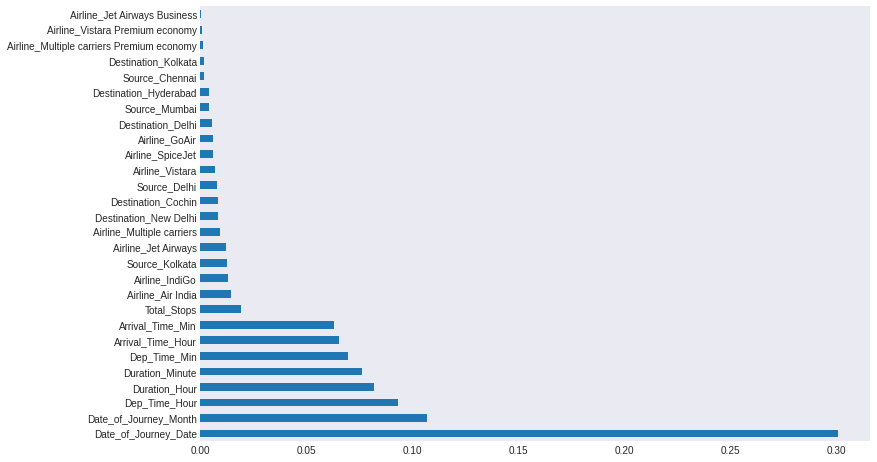

In [176]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [177]:
from sklearn.model_selection import train_test_split
X=final_df.drop('Price',axis=1)
y=final_df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [178]:
X_train.shape

(2136, 28)

In [179]:
X_test.shape

(535, 28)

In [180]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_scores={}


In [181]:
def fit_and_evaluate(prediction_model):
  print(f'####$ MACHINE LEARNING MODEL:{prediction_model}')
  model=prediction_model.fit(X_train,y_train)
  print("Traing score:{}".format(model.score(X_train,y_train)))
  predictions=model.predict(X_test)
  print("Prediction:\n",predictions)
  print("\n")
  r2score=r2_score(y_test,predictions)
  print("r2 score is:{}".format(r2score))
  r2_scores[f'{prediction_model}']=r2score
  print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
  print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
  print('RMSE:{}'.format(np.sqrt(mean_absolute_error(y_test,predictions))))
  sns.distplot(y_test-predictions)

In [182]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

####$ MACHINE LEARNING MODEL:KNeighborsRegressor()
Traing score:0.16737323391903214
Prediction:
 [10136.6 11342.   7488.2  7599.2  8993.6  8419.   9885.   5965.6  7743.6
 10111.8 12603.6  7536.2  5622.8  7583.8  9920.6  8313.6  8205.2  8293.
  8637.6  5897.4  7487.4  8630.   9376.4  9020.6  7804.4  9225.8 11644.
  8797.8 12855.6 19145.8 11013.2  5646.2 14584.6  4789.   5077.4 12333.4
 11038.4 10499.4  8807.8 10688.8  9202.6  7738.8  8955.6  8313.6  7788.
  7655.6  8446.6  7179.4  9041.6  7863.8  9149.   8806.  10281.8  8381.8
 11320.2  8308.   9964.6 14031.2 12374.4  8723.4  9061.4  8366.2  9597.4
  6856.4  9266.8  7711.6  9003.4 10981.2  9069.6  8368.2  7223.4  7323.4
 10756.6 12743.  10617.2 11645.2 11764.8  6962.   7151.6  9175.4 10637.4
  8162.4 10311.   8329.4  6829.2  8693.4  8125.6 10061.   7665.   9944.4
  7923.8 11307.   9738.2 10081.6 12054.   8253.6  8427.   9462.8 10001.6
  8739.2  9038.4  7380.4  7014.8  9716.4  9620.4  9794.  10127.4  9220.6
 10699.6  6067.8 10303.4  6685

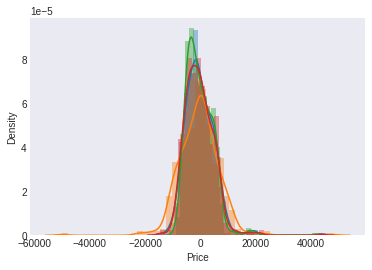

In [183]:
fit_and_evaluate(KNeighborsRegressor())
fit_and_evaluate(DecisionTreeRegressor())
fit_and_evaluate(GradientBoostingRegressor())
fit_and_evaluate(RandomForestRegressor())

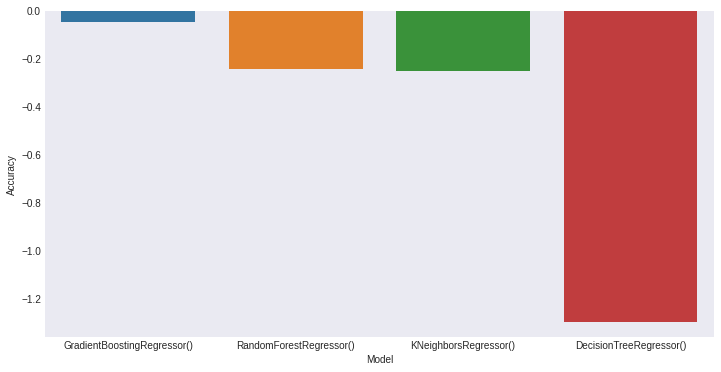

In [184]:
plt.figure(figsize=(12,6))
scores=pd.DataFrame(r2_scores.items(),columns=['Model','Accuracy'])
ax=sns.barplot(data=scores.sort_values("Accuracy",ascending=False),x='Model',y='Accuracy')
#ax.bar_label(ax.containers[0])

In [185]:
from sklearn.model_selection import RandomizedSearchCV


In [186]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=500,num=20)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=25,num=8)]
min_samples_split=[2,5,7,15]
min_samples_leaf=[1,2,4,10]
bootstrap=[True,False]


In [187]:
param_grid={'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_sample_leaf,'bootstrap':bootstrap,'max_features':max_features}


In [188]:
rfr=RandomForestRegressor()
rfr_tuned=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='neg_mean_squared_error',n_iter=15,random_state=42)


In [ ]:
rfr_tuned.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [ ]:
pred=rfr_tuned.predict(X_test)

In [ ]:
pred=pred.astype(int)

In [ ]:
test_predictions_df=pd.DataFrame({'Price':pred})

In [ ]:
test_predictions_df


In [ ]:
test_predictions_df.to_csv("Submissions.csv",index=False)

In [ ]:
param_grid